# Assignment : Select best 18 features based on ExtraTreesClassifier and SelectKBest.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("mobile data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,772,0,1.1,1,12,0,39,0.8,81,7,...,1314,1854,2819,17,15,3,1,1,0,3
1,1709,1,2.1,0,1,0,13,1.0,156,2,...,974,1385,3283,17,1,15,1,0,0,3
2,1949,0,2.6,1,4,0,47,0.3,199,4,...,407,822,1433,11,5,20,0,0,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1136
px_width         1109
ram              1560
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
x = df.drop(['price_range'],axis=1)

In [8]:
y = df['price_range']

In [9]:
y.value_counts()

3    501
1    501
0    500
2    498
Name: price_range, dtype: int64

# Extra Trees Classifier

In [10]:
from sklearn.ensemble import ExtraTreesClassifier # Decison tree

In [11]:
extr = ExtraTreesClassifier()

In [12]:
extr.fit(x,y)

ExtraTreesClassifier()

In [13]:
feature_importance = extr.feature_importances_
feature_importance #info gain

array([0.06053086, 0.02011935, 0.03464113, 0.01949323, 0.0328417 ,
       0.01779555, 0.03568786, 0.03442237, 0.03763508, 0.0347099 ,
       0.03260568, 0.04647091, 0.04802694, 0.38452389, 0.03477804,
       0.03457502, 0.03604949, 0.01571212, 0.01811014, 0.02127073])

In [14]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])
imp.head(10)

,Gain_Score
0,0.060531
1,0.020119
2,0.034641
3,0.019493
4,0.032842
5,0.017796
6,0.035688
7,0.034422
8,0.037635
9,0.034710


In [15]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [16]:
cols = pd.DataFrame(x.columns, columns=['Feature_Names'])
cols.head(10)

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [17]:
gains = pd.concat([cols,imp],axis=1)
gains

,Feature_Names,Gain_Score
0,battery_power,0.060531
1,blue,0.020119
2,clock_speed,0.034641
3,dual_sim,0.019493
4,fc,0.032842
5,four_g,0.017796
6,int_memory,0.035688
7,m_dep,0.034422
8,mobile_wt,0.037635
9,n_cores,0.034710


# 18 best features based on ExtraTreesClassifier

In [18]:
newx = gains.nlargest(18,'Gain_Score')
newx

,Feature_Names,Gain_Score
13,ram,0.384524
0,battery_power,0.060531
12,px_width,0.048027
11,px_height,0.046471
8,mobile_wt,0.037635
16,talk_time,0.036049
6,int_memory,0.035688
14,sc_h,0.034778
9,n_cores,0.034710
2,clock_speed,0.034641


<AxesSubplot:>

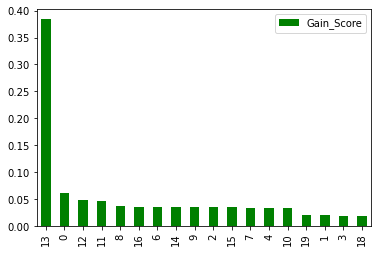

In [19]:
newx.plot(kind='bar',color=['green'])

<AxesSubplot:>

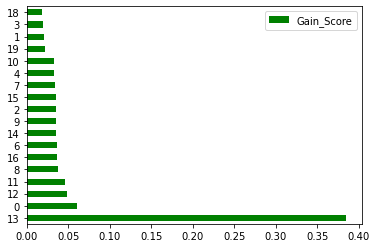

In [20]:
newx.plot(kind='barh',color=['green']) # barh mean horizontal

In [21]:
x.shape

(2000, 20)

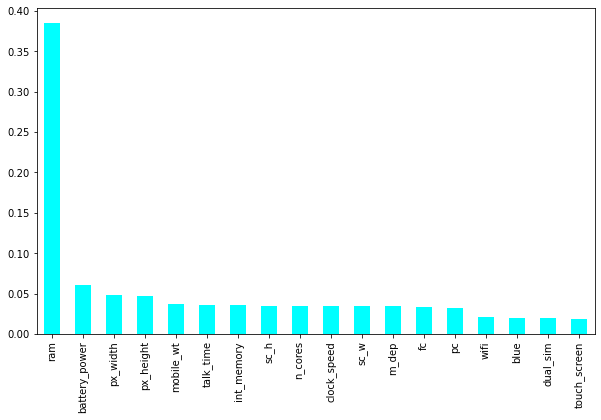

In [22]:
import matplotlib.pyplot as plt
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(18).plot(kind='bar', color='cyan')
plt.savefig('score1.png')

<AxesSubplot:>

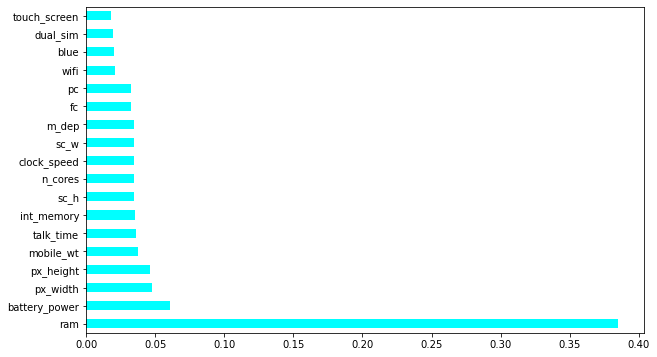

In [23]:
features = pd.Series(extr.feature_importances_, index = x.columns)
plt.figure(figsize=(10,6))
features.nlargest(18).plot(kind='barh', color='cyan') #bar=vertical but barh = horizontal
#plt.savefig('score1.png')

# Select K Best

In [26]:
df = pd.read_csv("mobile data.csv")
x = df.drop(['price_range'],axis=1)
y = df['price_range']

In [27]:
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,772,0,1.1,1,12,0,39,0.8,81,7,14,1314,1854,2819,17,15,3,1,1,0
1,1709,1,2.1,0,1,0,13,1.0,156,2,2,974,1385,3283,17,1,15,1,0,0
2,1949,0,2.6,1,4,0,47,0.3,199,4,7,407,822,1433,11,5,20,0,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [28]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, f_regression

In [29]:
model2 = SelectKBest(score_func=f_classif)

In [30]:
feature_score = model2.fit(x,y)

In [31]:
feature_score.scores_

array([3.11908732e+01, 4.59678478e-01, 6.13019154e-01, 4.89492949e-01,
       8.30396133e-01, 1.16710790e+00, 2.96575777e+00, 1.64410175e+00,
       3.62521255e+00, 2.58284723e+00, 8.74295515e-01, 1.95473713e+01,
       2.25200970e+01, 3.52623236e+03, 2.20350431e+00, 1.59731005e+00,
       1.66657575e+00, 4.39621377e-01, 1.45891088e+00, 2.61677203e-01])

In [32]:
cols = pd.DataFrame(feature_score.scores_ , columns=['Feature_Scores'])
cols

,Feature_Scores
0,31.190873
1,0.459678
2,0.613019
3,0.489493
4,0.830396
5,1.167108
6,2.965758
7,1.644102
8,3.625213
9,2.582847


In [33]:
x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [34]:
col2 = pd.DataFrame(x.columns, columns=['Feature_Names'])
col2.head()

,Feature_Names
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc


In [35]:
scores = pd.concat([col2,cols],axis=1)
scores

,Feature_Names,Feature_Scores
0,battery_power,31.190873
1,blue,0.459678
2,clock_speed,0.613019
3,dual_sim,0.489493
4,fc,0.830396
5,four_g,1.167108
6,int_memory,2.965758
7,m_dep,1.644102
8,mobile_wt,3.625213
9,n_cores,2.582847


# 18 best features based on SelectKBest

In [36]:
newx = scores.nlargest(18,'Feature_Scores')
newx

,Feature_Names,Feature_Scores
13,ram,3526.232362
0,battery_power,31.190873
12,px_width,22.520097
11,px_height,19.547371
8,mobile_wt,3.625213
6,int_memory,2.965758
9,n_cores,2.582847
14,sc_h,2.203504
16,talk_time,1.666576
7,m_dep,1.644102
